# Using data web services
We show the use of data web services Python interface for an use case: temperature data from [Svalbard](https://en.wikipedia.org/wiki/Svalbard).

## Load data and metadata 
Import the data web service Python interface. The data web service interface can be found here: https://github.com/rkoppe/dws. Download the dws.py file and place it into your working directory.

In [1]:
from dws import dws
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

Find some sensors offering temperature at Svalbard. Visit https://sensor.awi.de to explore platforms, devices and sensors and find useful platforms and further metadata. Platforms, devices and sensors have codes (aka urn) identifying measurements.

In [2]:
sensors = dws.sensors('station:svluwobs*temperature*')
pd.DataFrame.from_dict(sensors)

,code,id,logicalCode,platformId,sensor,unit
0,station:svluwobs:svluw2:ctd_103:temperature_se...,1257,station:svluwobs:svluw2:ctd_103:temperature_se...,58,svluwobs:svluw2:ctd_103:temperature_sensor_01:...,°C
1,station:svluwobs:svluw2:adcp_17374:temperature,1260,station:svluwobs:svluw2:adcp_17374:temperature,58,svluwobs:svluw2:adcp_17374:temperature,°C
2,station:svluwobs:svluw2:sbe38_657:temperature,427,station:svluwobs:svluw2:sbe38_657:temperature,58,svluwobs:svluw2:sbe38_657:temperature,°C
3,station:svluwobs:svluw2:ctd_181:temperature,441,station:svluwobs:svluw2:ctd_181:temperature,58,svluwobs:svluw2:ctd_181:temperature,°C
4,station:svluwobs:fb_731101:oxygen_sensor_574:t...,750,station:svluwobs:fb_731101:oxygen_sensor_574:t...,58,svluwobs:fb_731101:oxygen_sensor_574:temperature,°C
5,station:svluwobs:fb_731101:temperature_freshwa...,753,station:svluwobs:fb_731101:temperature_freshwa...,58,svluwobs:fb_731101:temperature_freshwater_9999...,°C
6,station:svluwobs:fb_731101:temperature_contain...,754,station:svluwobs:fb_731101:temperature_contain...,58,svluwobs:fb_731101:temperature_container_9999a...,°C
7,station:svluwobs:fb_731101:temperature_outside...,755,station:svluwobs:fb_731101:temperature_outside...,58,svluwobs:fb_731101:temperature_outside_9999c:t...,°C
8,station:svluwobs:fb_731101:sbe45_0403:temperature,746,station:svluwobs:fb_731101:sbe45_0403:temperature,58,svluwobs:fb_731101:sbe45_0403:temperature,°C
9,station:svluwobs:svluw2:ctd_578:temperature_se...,1024,station:svluwobs:svluw2:ctd_578:temperature_se...,58,svluwobs:svluw2:ctd_578:temperature_sensor_01:...,°C


Load data for temperature from the CTD 181. By default the service returns hourly averaged values. See http://dashboard.awi.de/data-xxl/ for details of the service.

In [3]:
data = dws.get("station:svluwobs:svluw2:ctd_181:temperature", "2018-10-15", "2018-11-05")
data.head()

,datetime,station:svluwobs:svluw2:ctd_181:temperature (mean) [°C]
0,2018-10-15 00:00:00,4.149522
1,2018-10-15 01:00:00,4.138868
2,2018-10-15 02:00:00,4.139458
3,2018-10-15 03:00:00,4.134048
4,2018-10-15 04:00:00,4.088826


Plot the data against time.

Populating the interactive namespace from numpy and matplotlib


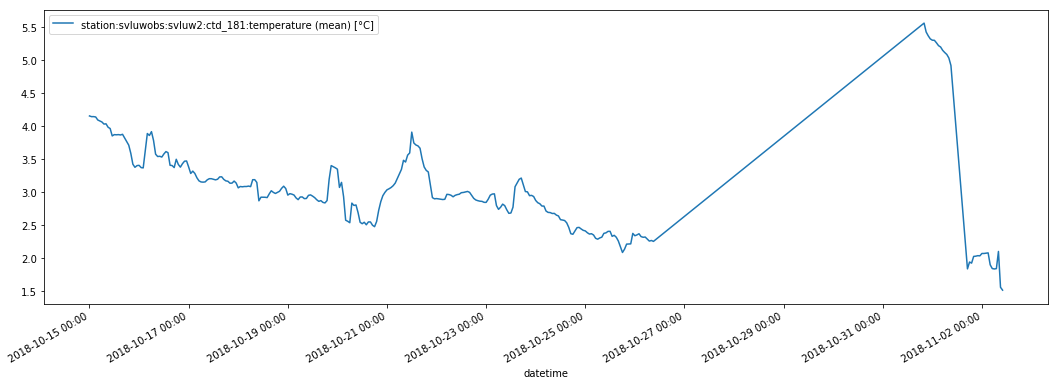

In [4]:
# size plot
%pylab inline
pylab.rcParams['figure.figsize'] = (18, 6)

# plot data
p = data.plot(x = "datetime", y = "station:svluwobs:svluw2:ctd_181:temperature (mean) [°C]")
p.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.show()

Load basic sensor metadata with the selected code. See https://sensor.awi.de/?urn=station:svluwobs:svluw2:ctd_181:temperature_sensor_01 for more information about this sensor. Note: there are some mapping issues for this example - they will be fixed soon.

In [5]:
sensor = dws.sensor("station:svluwobs:svluw2:ctd_181:temperature_sensor_01:Temperature")
sensor

{'id': 849,
 'name': 'Temperature',
 'type': 'temperature',
 'description': 'temperature',
 'definition': 'AWI',
 'unit': '°C',
 'properties': {'test': {'id': 323,
   'lower': -2.0,
   'upper': 36.0,
   'unit': '°C'},
  'local_range': {'id': 102597, 'lower': -1.9, 'upper': 10.0, 'unit': '°C'},
  'crit_spike_value': {'id': 102598, 'lower': 1.5, 'upper': 1.5, 'unit': '°C'},
  'crit_gradient_value': {'id': 102599,
   'lower': 1.0,
   'upper': 1.0,
   'unit': '°C'},
  'accuracy': {'id': 102600, 'lower': 0.005, 'upper': 0.005, 'unit': '°C'},
  'manufacturer_range': {'id': 102601,
   'lower': -2.0,
   'upper': 35.0,
   'unit': '°C'}}}

Load the whole platform metadata.

In [6]:
meta = dws.meta("station:svluwobs")
meta

{'id': 220,
 'code': 'station:svluwobs',
 'shortName': 'SVLUWOBS',
 'longName': 'AWIPEV  Underwater Observatory Svalbard',
 'description': 'AWIPEV_UNS is designed as an experimental platform project between the HZG and the AWI to host sensors and sensor units in a polar fjord system. The system provides underwater data connection and power as well as a server infrastructure for system and sensor control. Attached is an upward looking ADCP and a CTD plus sensors for turbidity, oxygen, chl-a fluorescence',
 'definition': 'Station',
 'children': [{'id': 503,
   'code': 'station:svluwobs:svluw2',
   'shortName': 'svluw2',
   'longName': 'Svalbard Underwater Node 2',
   'description': '',
   'definition': '',
   'children': [{'id': 1263,
     'code': 'station:svluwobs:svluw2:janitza_17181453',
     'shortName': 'janitza_17181453',
     'longName': 'Janitza_housekeeping_system_17181453',
     'description': 'Janitza UMG 96 RM-EL Universal Measuring Device UMG96RM-EL, Ethernet L-N: 10-300VACL

We have defined measurement properties like "measurement range" for our temperature measure. Apply it to the data.

In [7]:
range = meta['map']['station:svluwobs:svluw2:ctd_181:temperature_sensor_01:temperature']['properties']['local_range']
range

{'name': 'local_range', 'lower': -1.9, 'upper': 10.0, 'unit': '°C'}

In [8]:
data['range_check'] = \
    (range['lower'] < data['station:svluwobs:svluw2:ctd_181:temperature (mean) [°C]']) & \
    (range['upper'] > data['station:svluwobs:svluw2:ctd_181:temperature (mean) [°C]'])
data.head()

,datetime,station:svluwobs:svluw2:ctd_181:temperature (mean) [°C],range_check
0,2018-10-15 00:00:00,4.149522,True
1,2018-10-15 01:00:00,4.138868,True
2,2018-10-15 02:00:00,4.139458,True
3,2018-10-15 03:00:00,4.134048,True
4,2018-10-15 04:00:00,4.088826,True


The CTD is profiling temperature in the water column. Explore data.

In [9]:
sensors = dws.sensors("station:svluwobs:svluw2:ctd_181*")
pd.DataFrame.from_dict(sensors)

,code,id,logicalCode,platformId,sensor,unit
0,station:svluwobs:svluw2:ctd_181:conductivity,442,station:svluwobs:svluw2:ctd_181:conductivity,58,svluwobs:svluw2:ctd_181:conductivity,mS/cm
1,station:svluwobs:svluw2:ctd_181:pressure,440,station:svluwobs:svluw2:ctd_181:pressure,58,svluwobs:svluw2:ctd_181:pressure,dbar
2,station:svluwobs:svluw2:ctd_181:temperature,441,station:svluwobs:svluw2:ctd_181:temperature,58,svluwobs:svluw2:ctd_181:temperature,°C
3,station:svluwobs:svluw2:ctd_181:oxygen_concent...,443,station:svluwobs:svluw2:ctd_181:oxygen_concent...,58,svluwobs:svluw2:ctd_181:oxygen_concentration,%
4,station:svluwobs:svluw2:ctd_181:chlorophyll_co...,444,station:svluwobs:svluw2:ctd_181:chlorophyll_co...,58,svluwobs:svluw2:ctd_181:chlorophyll_concentration,µg/L
5,station:svluwobs:svluw2:ctd_181:turbidity,445,station:svluwobs:svluw2:ctd_181:turbidity,58,svluwobs:svluw2:ctd_181:turbidity,FTU
6,station:svluwobs:svluw2:ctd_181:salinity,446,station:svluwobs:svluw2:ctd_181:salinity,58,svluwobs:svluw2:ctd_181:salinity,PSU
7,station:svluwobs:svluw2:ctd_181:oxygen_mg,447,station:svluwobs:svluw2:ctd_181:oxygen_mg,58,svluwobs:svluw2:ctd_181:oxygen_mg,mg/l
8,station:svluwobs:svluw2:ctd_181:oxygen_ml,448,station:svluwobs:svluw2:ctd_181:oxygen_ml,58,svluwobs:svluw2:ctd_181:oxygen_ml,ml/l


In [10]:
data = dws.get(
  ["station:svluwobs:svluw2:ctd_181:temperature", "station:svluwobs:svluw2:ctd_181:pressure"],
  begin="2018-10-01",
  end="2018-11-05",
  aggregate = "hour")
data.head()

,datetime,station:svluwobs:svluw2:ctd_181:temperature (mean) [°C],station:svluwobs:svluw2:ctd_181:pressure (mean) [dbar]
0,2018-10-01 00:00:00,2.089601,5.955330
1,2018-10-01 01:00:00,2.465500,6.194303
2,2018-10-01 02:00:00,2.899469,6.421582
3,2018-10-01 03:00:00,2.271837,6.513725
4,2018-10-01 04:00:00,2.238089,6.502787


Populating the interactive namespace from numpy and matplotlib


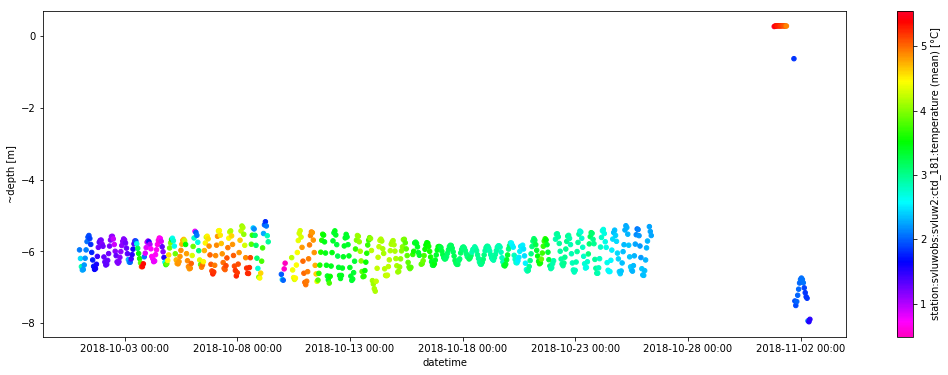

In [11]:
# size plot
%pylab inline
pylab.rcParams["figure.figsize"] = (18, 6)

# plot data
#data["timestamp"] = data["datetime"].astype(np.int64)/1e12
data["timestamp"] = mdates.date2num(data["datetime"])
data["depth"] = -data["station:svluwobs:svluw2:ctd_181:pressure (mean) [dbar]"]
p = data.plot.scatter(
    x = "timestamp",
    y = "depth",
    c = "station:svluwobs:svluw2:ctd_181:temperature (mean) [°C]",
    colormap = "gist_rainbow_r",
    sharex = False)
p.set_xticklabels([mdates.num2date(ts).strftime("%Y-%m-%d %H:%M") for ts in p.get_xticks()])
plt.xlabel("datetime")
plt.ylabel("~depth [m]")
plt.show()